<a href="https://colab.research.google.com/github/CesarAugusto88/Trabalho_IA_RNA/blob/main/Trabalho_IA_BackPropagation_Sent_1_e_Sent_2_separados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Inteligência Artificial

# Aprendizagem de Máquina

# Prof. Elcio Hideiti Shiguemori
## Cesar Augusto de Moraes Costa 330807/2022

**Importando as bibliotecas**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, normalize, MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

**Carregamento dos dados**

In [2]:
!gdown --id 19DHNrSH1lMbqy6AowqzuiaspYAnAY6E3

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=19DHNrSH1lMbqy6AowqzuiaspYAnAY6E3
To: /content/S220201008.csv
100% 99.5M/99.5M [00:00<00:00, 184MB/s]


In [3]:
!gdown --id 18QkzQAFqL6DfV9-JdIDYll3wSkdEav_l

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=18QkzQAFqL6DfV9-JdIDYll3wSkdEav_l
To: /content/S120201007.csv
100% 36.4M/36.4M [00:00<00:00, 98.7MB/s]


In [4]:
!gdown --id 1cY5vm70qGOBnryYQoaBrN47NybTMILAq


/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1cY5vm70qGOBnryYQoaBrN47NybTMILAq
To: /content/S120200528.csv
100% 36.1M/36.1M [00:00<00:00, 140MB/s]


In [5]:
!gdown --id 1MfNg2Qd3zxbV2Qwz5rRZifmAgIVm2UKT

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1MfNg2Qd3zxbV2Qwz5rRZifmAgIVm2UKT
To: /content/S220200531.csv
100% 100M/100M [00:00<00:00, 139MB/s] 


**Pré-processamento**

In [6]:
pd.set_option('display.max_columns', None)  # para mostrar todas colunas

In [7]:
m_s1_c1=pd.read_csv('S120201007.csv')
m_s1_c1

,fid,DN,20201007_S1_VH_count,20201007_S1_VH_sum,20201007_S1_VH_mean,20201007_S1_VH_median,20201007_S1_VH_stdev,20201007_S1_VH_min,20201007_S1_VH_max,20201007_S1_VH_range,20201007_S1_VH_minority,20201007_S1_VH_majority,20201007_S1_VH_variety,20201007_S1_VH_variance,20201007_S1_VV_count,20201007_S1_VV_sum,20201007_S1_VV_mean,20201007_S1_VV_median,20201007_S1_VV_stdev,20201007_S1_VV_min,20201007_S1_VV_max,20201007_S1_VV_range,20201007_S1_VV_minority,20201007_S1_VV_majority,20201007_S1_VV_variety,20201007_S1_VV_variance
0,1250,3,24.0,0.633654,0.026402,0.024943,0.014827,0.005854,0.077908,0.072054,0.005854,0.005854,24,0.000220,24.0,3.096987,0.129041,0.118967,0.070221,0.028502,0.334357,0.305855,0.028502,0.028502,24,0.004931
1,1251,33,40.0,0.899754,0.022494,0.018994,0.014032,0.005554,0.063726,0.058172,0.005554,0.005554,40,0.000197,40.0,2.937876,0.073447,0.068689,0.041294,0.016143,0.207863,0.191720,0.016143,0.016143,40,0.001705
2,1274,3,22.0,0.622369,0.028289,0.025780,0.013895,0.010080,0.068227,0.058147,0.010080,0.010080,22,0.000193,22.0,2.015602,0.091618,0.083105,0.040384,0.027963,0.178815,0.150853,0.027963,0.027963,22,0.001631
3,1282,4,32.0,0.492804,0.015400,0.013414,0.006689,0.006707,0.037720,0.031013,0.006707,0.006707,32,0.000045,32.0,2.011555,0.062861,0.059811,0.026192,0.028129,0.142598,0.114469,0.028129,0.028129,32,0.000686
4,1283,33,3.0,0.093754,0.031251,0.030557,0.004536,0.026076,0.037121,0.011045,0.026076,0.026076,3,0.000021,3.0,0.225060,0.075020,0.075279,0.015546,0.055851,0.093929,0.038078,0.055851,0.055851,3,0.000242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90059,98176,3,48522.0,1856.529188,0.038262,0.033966,0.020084,0.001464,0.249638,0.248173,0.001464,0.072416,48151,0.000403,48522.0,7251.426081,0.149446,0.131924,0.081486,0.003691,1.098468,1.094778,0.003691,0.121593,48151,0.006640
90060,98177,39,6482.0,47.904245,0.007390,0.006470,0.004631,0.000982,0.087139,0.086157,0.000982,0.003554,6435,0.000021,6482.0,173.583800,0.026779,0.021734,0.018929,0.002930,0.299570,0.296640,0.002930,0.006348,6434,0.000358
90061,98196,39,6353.0,42.290508,0.006657,0.005685,0.004313,0.000198,0.091714,0.091516,0.000198,0.002831,6286,0.000019,6353.0,144.375342,0.022726,0.019006,0.016391,0.003196,0.291294,0.288098,0.003196,0.006632,6283,0.000269
90062,98213,3,177312.0,6431.275320,0.036271,0.032136,0.019893,0.000929,0.370145,0.369216,0.000929,0.022183,175438,0.000396,177312.0,23397.411357,0.131956,0.115943,0.074100,0.003204,1.278527,1.275324,0.003204,0.073080,175547,0.005491


In [8]:
m_s2_c1=pd.read_csv('S220201008.csv')
m_s2_c1

,fid,DN,20201008_S2_B1_count,20201008_S2_B1_sum,20201008_S2_B1_mean,20201008_S2_B1_median,20201008_S2_B1_stdev,20201008_S2_B1_min,20201008_S2_B1_max,20201008_S2_B1_range,20201008_S2_B1_minority,20201008_S2_B1_majority,20201008_S2_B1_variety,20201008_S2_B1_variance,20201008_S2_B2_count,20201008_S2_B2_sum,20201008_S2_B2_mean,20201008_S2_B2_median,20201008_S2_B2_stdev,20201008_S2_B2_min,20201008_S2_B2_max,20201008_S2_B2_range,20201008_S2_B2_minority,20201008_S2_B2_majority,20201008_S2_B2_variety,20201008_S2_B2_variance,20201008_S2_B3_count,20201008_S2_B3_sum,20201008_S2_B3_mean,20201008_S2_B3_median,20201008_S2_B3_stdev,20201008_S2_B3_min,20201008_S2_B3_max,20201008_S2_B3_range,20201008_S2_B3_minority,20201008_S2_B3_majority,20201008_S2_B3_variety,20201008_S2_B3_variance,20201008_S2_B4_count,20201008_S2_B4_sum,20201008_S2_B4_mean,20201008_S2_B4_median,20201008_S2_B4_stdev,20201008_S2_B4_min,20201008_S2_B4_max,20201008_S2_B4_range,20201008_S2_B4_minority,20201008_S2_B4_majority,20201008_S2_B4_variety,20201008_S2_B4_variance,20201008_S2_B5_count,20201008_S2_B5_sum,20201008_S2_B5_mean,20201008_S2_B5_median,20201008_S2_B5_stdev,20201008_S2_B5_min,20201008_S2_B5_max,20201008_S2_B5_range,20201008_S2_B5_minority,20201008_S2_B5_majority,20201008_S2_B5_variety,20201008_S2_B5_variance,20201008_S2_B6_count,20201008_S2_B6_sum,20201008_S2_B6_mean,20201008_S2_B6_median,20201008_S2_B6_stdev,20201008_S2_B6_min,20201008_S2_B6_max,20201008_S2_B6_range,20201008_S2_B6_minority,20201008_S2_B6_majority,20201008_S2_B6_variety,20201008_S2_B6_variance,20201008_S2_B7_count,20201008_S2_B7_sum,20201008_S2_B7_mean,20201008_S2_B7_median,20201008_S2_B7_stdev,20201008_S2_B7_min,20201008_S2_B7_max,20201008_S2_B7_range,20201008_S2_B7_minority,20201008_S2_B7_majority,20201008_S2_B7_variety,20201008_S2_B7_variance,20201008_S2_B8A_count,20201008_S2_B8A_sum,20201008_S2_B8A_mean,20201008_S2_B8A_median,20201008_S2_B8A_stdev,20201008_S2_B8A_min,20201008_S2_B8A_max,20201008_S2_B8A_range,20201008_S2_B8A_minority,20201008_S2_B8A_majority,20201008_S2_B8A_variety,20201008_S2_B8A_variance,20201008_S2_B8_count,20201008_S2_B8_sum,20201008_S2_B8_mean,20201008_S2_B8_median,20201008_S2_B8_stdev,20201008_S2_B8_min,20201008_S2_B8_max,20201008_S2_B8_range,20201008_S2_B8_minority,20201008_S2_B8_majority,20201008_S2_B8_variety,20201008_S2_B8_variance,20201008_S2_B9_count,20201008_S2_B9_sum,20201008_S2_B9_mean,20201008_S2_B9_median,20201008_S2_B9_stdev,20201008_S2_B9_min,20201008_S2_B9_max,20201008_S2_B9_range,20201008_S2_B9_minority,20201008_S2_B9_majority,20201008_S2_B9_variety,20201008_S2_B9_variance,20201008_S2_B10_count,20201008_S2_B10_sum,20201008_S2_B10_mean,20201008_S2_B10_median,20201008_S2_B10_stdev,20201008_S2_B10_min,20201008_S2_B10_max,20201008_S2_B10_range,20201008_S2_B10_minority,20201008_S2_B10_majority,20201008_S2_B10_variety,20201008_S2_B10_variance,20201008_S2_B11_count,20201008_S2_B11_sum,20201008_S2_B11_mean,20201008_S2_B11_median,20201008_S2_B11_stdev,20201008_S2_B11_min,20201008_S2_B11_max,20201008_S2_B11_range,20201008_S2_B11_minority,20201008_S2_B11_majority,20201008_S2_B11_variety,20201008_S2_B11_variance,20201008_S2_B12_count,20201008_S2_B12_sum,20201008_S2_B12_mean,20201008_S2_B12_median,20201008_S2_B12_stdev,20201008_S2_B12_min,20201008_S2_B12_max,20201008_S2_B12_range,20201008_S2_B12_minority,20201008_S2_B12_majority,20201008_S2_B12_variety,20201008_S2_B12_variance
0,1250,3,1.375895,1.948452e+03,1416.133981,1413.0,21.854578,1393.0,1458.0,65.0,1393.0,1393.0,8.0,477.622559,51.0,4077.0,79.941176,79.0,3.164830,76.0,87.0,11.0,85.0,77.0,11.0,10.016148,51.0,3599.0,70.568627,70.0,3.321085,66.0,79.0,13.0,74.0,67.0,14.0,11.029604,51.0,3082.0,60.431373,61.0,10.626004,47.0,83.0,36.0,53.0,48.0,25.0,112.911957,12.0,12878.0,1073.166667,1043.5,96.820137,925.0,1234.0,309.0,925.0,925.0,12.0,9374.138889,12.0,24044.0,2003.666667,1997.0,231.913897,1681.0,2366.0,685.0,1681.0,1681.0,12.0,53784.055556,12.0,29842.0,2486.833333,2392.5,384.439599,1998.0,3139.0,1141.0,1998.0,1998.0,12

In [9]:
m_s1_c2=pd.read_csv('S120200528.csv')
m_s1_c2

,fid,DN,S1_20200528_VHcount,S1_20200528_VHsum,S1_20200528_VHmean,S1_20200528_VHmedian,S1_20200528_VHstdev,S1_20200528_VHmin,S1_20200528_VHmax,S1_20200528_VHrange,S1_20200528_VHminority,S1_20200528_VHmajority,S1_20200528_VHvariety,S1_20200528_VHvariance,S1_20200528_VV_count,S1_20200528_VV_sum,S1_20200528_VV_mean,S1_20200528_VV_median,S1_20200528_VV_stdev,S1_20200528_VV_min,S1_20200528_VV_max,S1_20200528_VV_range,S1_20200528_VV_minority,S1_20200528_VV_majority,S1_20200528_VV_variety,S1_20200528_VV_variance
0,1250,3,27.0,0.795952,0.029480,0.026813,0.012523,0.013947,0.067887,0.053940,0.013947,0.013947,27,0.000157,27.0,4.219886,0.156292,0.142675,0.098968,0.028538,0.429755,0.401217,0.028538,0.028538,27,0.009795
1,1251,33,40.0,0.987869,0.024697,0.021505,0.014039,0.002930,0.079253,0.076323,0.002930,0.002930,40,0.000197,40.0,3.479310,0.086983,0.080040,0.038268,0.012175,0.198315,0.186140,0.012175,0.012175,40,0.001464
2,1274,3,22.0,0.593056,0.026957,0.024638,0.009006,0.014618,0.044852,0.030234,0.014618,0.014618,22,0.000081,22.0,2.316674,0.105303,0.103094,0.061273,0.029770,0.334561,0.304791,0.029770,0.029770,22,0.003754
3,1282,4,36.0,0.988538,0.027459,0.023446,0.014222,0.006988,0.069067,0.062079,0.006988,0.006988,36,0.000202,36.0,3.803303,0.105647,0.098930,0.041455,0.035007,0.206789,0.171782,0.035007,0.035007,36,0.001718
4,1283,33,2.0,0.058888,0.029444,0.029444,0.007081,0.022363,0.036525,0.014161,0.022363,0.022363,2,0.000050,2.0,0.187223,0.093611,0.093611,0.024388,0.069223,0.118000,0.048777,0.069223,0.069223,2,0.000595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90059,98176,3,48425.0,1969.477428,0.040671,0.036105,0.021721,0.002518,0.265330,0.262811,0.002518,0.007512,48045,0.000472,48425.0,8283.676224,0.171062,0.150132,0.094962,0.005807,1.224430,1.218623,0.005807,0.011327,48060,0.009018
90060,98177,39,6482.0,281.328242,0.043401,0.039342,0.021112,0.003075,0.174765,0.171690,0.003075,0.008979,6434,0.000446,6482.0,1581.560588,0.243993,0.224281,0.116081,0.018543,1.000319,0.981776,0.018543,0.079533,6432,0.013475
90061,98196,39,6372.0,128.996088,0.020244,0.018514,0.009395,0.002174,0.086027,0.083853,0.002174,0.007509,6307,0.000088,6372.0,696.054565,0.109236,0.098312,0.053664,0.013224,0.495337,0.482113,0.013224,0.024777,6304,0.002880
90062,98213,3,177254.0,6890.852883,0.038876,0.034384,0.021388,0.000590,0.316217,0.315627,0.000590,0.016016,175451,0.000457,177254.0,26997.626269,0.152310,0.133512,0.087071,0.002125,1.122998,1.120873,0.002125,0.215969,175478,0.007581


In [10]:
m_s2_c2=pd.read_csv('S220200531.csv')
m_s2_c2

,fid,DN,20200531_S2_B1_count,20200531_S2_B1_sum,20200531_S2_B1_mean,20200531_S2_B1_median,20200531_S2_B1_stdev,20200531_S2_B1_min,20200531_S2_B1_max,20200531_S2_B1_range,20200531_S2_B1_minority,20200531_S2_B1_majority,20200531_S2_B1_variety,20200531_S2_B1_variance,20200531_S2_B2_count,20200531_S2_B2_sum,20200531_S2_B2_mean,20200531_S2_B2_median,20200531_S2_B2_stdev,20200531_S2_B2_min,20200531_S2_B2_max,20200531_S2_B2_range,20200531_S2_B2_minority,20200531_S2_B2_majority,20200531_S2_B2_variety,20200531_S2_B2_variance,20200531_S2_B3_count,20200531_S2_B3_sum,20200531_S2_B3_mean,20200531_S2_B3_median,20200531_S2_B3_stdev,20200531_S2_B3_min,20200531_S2_B3_max,20200531_S2_B3_range,20200531_S2_B3_minority,20200531_S2_B3_majority,20200531_S2_B3_variety,20200531_S2_B3_variance,20200531_S2_B4_count,20200531_S2_B4_sum,20200531_S2_B4_mean,20200531_S2_B4_median,20200531_S2_B4_stdev,20200531_S2_B4_min,20200531_S2_B4_max,20200531_S2_B4_range,20200531_S2_B4_minority,20200531_S2_B4_majority,20200531_S2_B4_variety,20200531_S2_B4_variance,20200531_S2_B5_count,20200531_S2_B5_sum,20200531_S2_B5_mean,20200531_S2_B5_median,20200531_S2_B5_stdev,20200531_S2_B5_min,20200531_S2_B5_max,20200531_S2_B5_range,20200531_S2_B5_minority,20200531_S2_B5_majority,20200531_S2_B5_variety,20200531_S2_B5_variance,20200531_S2_B6_count,20200531_S2_B6_sum,20200531_S2_B6_mean,20200531_S2_B6_median,20200531_S2_B6_stdev,20200531_S2_B6_min,20200531_S2_B6_max,20200531_S2_B6_range,20200531_S2_B6_minority,20200531_S2_B6_majority,20200531_S2_B6_variety,20200531_S2_B6_variance,20200531_S2_B7_count,20200531_S2_B7_sum,20200531_S2_B7_mean,20200531_S2_B7_median,20200531_S2_B7_stdev,20200531_S2_B7_min,20200531_S2_B7_max,20200531_S2_B7_range,20200531_S2_B7_minority,20200531_S2_B7_majority,20200531_S2_B7_variety,20200531_S2_B7_variance,20200531_S2_B8_count,20200531_S2_B8_sum,20200531_S2_B8_mean,20200531_S2_B8_median,20200531_S2_B8_stdev,20200531_S2_B8_min,20200531_S2_B8_max,20200531_S2_B8_range,20200531_S2_B8_minority,20200531_S2_B8_majority,20200531_S2_B8_variety,20200531_S2_B8_variance,20200531_S2_B8A_count,20200531_S2_B8A_sum,20200531_S2_B8A_mean,20200531_S2_B8A_median,20200531_S2_B8A_stdev,20200531_S2_B8A_min,20200531_S2_B8A_max,20200531_S2_B8A_range,20200531_S2_B8A_minority,20200531_S2_B8A_majority,20200531_S2_B8A_variety,20200531_S2_B8A_variance,20200531_S2_B9_count,20200531_S2_B9_sum,20200531_S2_B9_mean,20200531_S2_B9_median,20200531_S2_B9_stdev,20200531_S2_B9_min,20200531_S2_B9_max,20200531_S2_B9_range,20200531_S2_B9_minority,20200531_S2_B9_majority,20200531_S2_B9_variety,20200531_S2_B9_variance,20200531_S2_B10_count,20200531_S2_B10_sum,20200531_S2_B10_mean,20200531_S2_B10_median,20200531_S2_B10_stdev,20200531_S2_B10_min,20200531_S2_B10_max,20200531_S2_B10_range,20200531_S2_B10_minority,20200531_S2_B10_majority,20200531_S2_B10_variety,20200531_S2_B10_variance,20200531_S2_B11_count,20200531_S2_B11_sum,20200531_S2_B11_mean,20200531_S2_B11_median,20200531_S2_B11_stdev,20200531_S2_B11_min,20200531_S2_B11_max,20200531_S2_B11_range,20200531_S2_B11_minority,20200531_S2_B11_majority,20200531_S2_B11_variety,20200531_S2_B11_variance,20200531_S2_B12_count,20200531_S2_B12_sum,20200531_S2_B12_mean,20200531_S2_B12_median,20200531_S2_B12_stdev,20200531_S2_B12_min,20200531_S2_B12_max,20200531_S2_B12_range,20200531_S2_B12_minority,20200531_S2_B12_majority,20200531_S2_B12_variety,20200531_S2_B12_variance
0,1250,3,1.375895,1.490411e+03,1083.229878,1082.0,14.611335,1069.0,1110.0,41.0,1069.0,1069.0,8.0,213.491104,51.0,40315.0,790.490196,788.0,28.818820,733.0,852.0,119.0,733.0,762.0,42.0,830.524414,51.0,34976.0,685.803922,672.0,59.113722,556.0,778.0,222.0,556.0,737.0,44.0,3494.432141,51.0,21195.0,415.588235,405.0,62.218520,317.0,577.0,260.0,317.0,347.0,45.0,3871.144175,12.0,8858.0,738.166667,737.0,86.810938,624.0,869.0,245.0,624.0,624.0,12.0,7536.138889,12.0,23188.0,1932.333333,1859.5,288.473954,1561.0,2573.0,1012.0,1561.0,1561.0,12.0,83217.222222,12.0,28862.0,2405.166667,2302.5,393.414716,1972.0,322

In [11]:
# Mesclagem com junção interna de colunas fid , Digital Number (DN)  
# Sentinel 1 conjunto 1 e conjunto 2
dados_s1 = pd.merge(m_s1_c1, m_s1_c2, how='inner', on=('fid','DN'))
dados_s1

,fid,DN,20201007_S1_VH_count,20201007_S1_VH_sum,20201007_S1_VH_mean,20201007_S1_VH_median,20201007_S1_VH_stdev,20201007_S1_VH_min,20201007_S1_VH_max,20201007_S1_VH_range,20201007_S1_VH_minority,20201007_S1_VH_majority,20201007_S1_VH_variety,20201007_S1_VH_variance,20201007_S1_VV_count,20201007_S1_VV_sum,20201007_S1_VV_mean,20201007_S1_VV_median,20201007_S1_VV_stdev,20201007_S1_VV_min,20201007_S1_VV_max,20201007_S1_VV_range,20201007_S1_VV_minority,20201007_S1_VV_majority,20201007_S1_VV_variety,20201007_S1_VV_variance,S1_20200528_VHcount,S1_20200528_VHsum,S1_20200528_VHmean,S1_20200528_VHmedian,S1_20200528_VHstdev,S1_20200528_VHmin,S1_20200528_VHmax,S1_20200528_VHrange,S1_20200528_VHminority,S1_20200528_VHmajority,S1_20200528_VHvariety,S1_20200528_VHvariance,S1_20200528_VV_count,S1_20200528_VV_sum,S1_20200528_VV_mean,S1_20200528_VV_median,S1_20200528_VV_stdev,S1_20200528_VV_min,S1_20200528_VV_max,S1_20200528_VV_range,S1_20200528_VV_minority,S1_20200528_VV_majority,S1_20200528_VV_variety,S1_20200528_VV_variance
0,1250,3,24.0,0.633654,0.026402,0.024943,0.014827,0.005854,0.077908,0.072054,0.005854,0.005854,24,0.000220,24.0,3.096987,0.129041,0.118967,0.070221,0.028502,0.334357,0.305855,0.028502,0.028502,24,0.004931,27.0,0.795952,0.029480,0.026813,0.012523,0.013947,0.067887,0.053940,0.013947,0.013947,27,0.000157,27.0,4.219886,0.156292,0.142675,0.098968,0.028538,0.429755,0.401217,0.028538,0.028538,27,0.009795
1,1251,33,40.0,0.899754,0.022494,0.018994,0.014032,0.005554,0.063726,0.058172,0.005554,0.005554,40,0.000197,40.0,2.937876,0.073447,0.068689,0.041294,0.016143,0.207863,0.191720,0.016143,0.016143,40,0.001705,40.0,0.987869,0.024697,0.021505,0.014039,0.002930,0.079253,0.076323,0.002930,0.002930,40,0.000197,40.0,3.479310,0.086983,0.080040,0.038268,0.012175,0.198315,0.186140,0.012175,0.012175,40,0.001464
2,1274,3,22.0,0.622369,0.028289,0.025780,0.013895,0.010080,0.068227,0.058147,0.010080,0.010080,22,0.000193,22.0,2.015602,0.091618,0.083105,0.040384,0.027963,0.178815,0.150853,0.027963,0.027963,22,0.001631,22.0,0.593056,0.026957,0.024638,0.009006,0.014618,0.044852,0.030234,0.014618,0.014618,22,0.000081,22.0,2.316674,0.105303,0.103094,0.061273,0.029770,0.334561,0.304791,0.029770,0.029770,22,0.003754
3,1282,4,32.0,0.492804,0.015400,0.013414,0.006689,0.006707,0.037720,0.031013,0.006707,0.006707,32,0.000045,32.0,2.011555,0.062861,0.059811,0.026192,0.028129,0.142598,0.114469,0.028129,0.028129,32,0.000686,36.0,0.988538,0.027459,0.023446,0.014222,0.006988,0.069067,0.062079,0.006988,0.006988,36,0.000202,36.0,3.803303,0.105647,0.098930,0.041455,0.035007,0.206789,0.171782,0.035007,0.035007,36,0.001718
4,1283,33,3.0,0.093754,0.031251,0.030557,0.004536,0.026076,0.037121,0.011045,0.026076,0.026076,3,0.000021,3.0,0.225060,0.075020,0.075279,0.015546,0.055851,0.093929,0.038078,0.055851,0.055851,3,0.000242,2.0,0.058888,0.029444,0.029444,0.007081,0.022363,0.036525,0.014161,0.022363,0.022363,2,0.000050,2.0,0.187223,0.093611,0.093611,0.024388,0.069223,0.118000,0.048777,0.069223,0.069223,2,0.000595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90059,98176,3,48522.0,1856.529188,0.038262,0.033966,0.020084,0.001464,0.249638,0.248173,0.001464,0.072416,48151,0.000403,48522.0,7251.426081,0.149446,0.131924,0.081486,0.003691,1.098468,1.094778,0.003691,0.121593,48151,0.006640,48425.0,1969.477428,0.040671,0.036105,0.021721,0.002518,0.265330,0.262811,0.002518,0.007512,48045,0.000472,48425.0,8283.676224,0.171062,0.150132,0.094962,0.005807,1.224430,1.218623,0.005807,0.011327,48060,0.009018
90060,98177,39,6482.0,47.904245,0.007390,0.006470,0.004631,0.000982,0.087139,0.086157,0.000982,0.003554,6435,0.000021,6482.0,173.583800,0.026779,0.021734,0.018929,0.002930,0.299570,0.296640,0.002930,0.006348,6434,0.000358,6482.0,281.328242,0.043401,0.039342,0.021112,0.003075,0.174765,0.171690,0.003075,0.008979,6434,0.000446,6482.

In [12]:
# Mesclagem com junção interna de colunas fid , Digital Number (DN)  
# Sentinel 2 conjunto 1 e conjunto 2
dados_s2 = pd.merge(m_s2_c2, m_s2_c1, how='inner', on=('fid','DN'))
dados_s2

,fid,DN,20200531_S2_B1_count,20200531_S2_B1_sum,20200531_S2_B1_mean,20200531_S2_B1_median,20200531_S2_B1_stdev,20200531_S2_B1_min,20200531_S2_B1_max,20200531_S2_B1_range,20200531_S2_B1_minority,20200531_S2_B1_majority,20200531_S2_B1_variety,20200531_S2_B1_variance,20200531_S2_B2_count,20200531_S2_B2_sum,20200531_S2_B2_mean,20200531_S2_B2_median,20200531_S2_B2_stdev,20200531_S2_B2_min,20200531_S2_B2_max,20200531_S2_B2_range,20200531_S2_B2_minority,20200531_S2_B2_majority,20200531_S2_B2_variety,20200531_S2_B2_variance,20200531_S2_B3_count,20200531_S2_B3_sum,20200531_S2_B3_mean,20200531_S2_B3_median,20200531_S2_B3_stdev,20200531_S2_B3_min,20200531_S2_B3_max,20200531_S2_B3_range,20200531_S2_B3_minority,20200531_S2_B3_majority,20200531_S2_B3_variety,20200531_S2_B3_variance,20200531_S2_B4_count,20200531_S2_B4_sum,20200531_S2_B4_mean,20200531_S2_B4_median,20200531_S2_B4_stdev,20200531_S2_B4_min,20200531_S2_B4_max,20200531_S2_B4_range,20200531_S2_B4_minority,20200531_S2_B4_majority,20200531_S2_B4_variety,20200531_S2_B4_variance,20200531_S2_B5_count,20200531_S2_B5_sum,20200531_S2_B5_mean,20200531_S2_B5_median,20200531_S2_B5_stdev,20200531_S2_B5_min,20200531_S2_B5_max,20200531_S2_B5_range,20200531_S2_B5_minority,20200531_S2_B5_majority,20200531_S2_B5_variety,20200531_S2_B5_variance,20200531_S2_B6_count,20200531_S2_B6_sum,20200531_S2_B6_mean,20200531_S2_B6_median,20200531_S2_B6_stdev,20200531_S2_B6_min,20200531_S2_B6_max,20200531_S2_B6_range,20200531_S2_B6_minority,20200531_S2_B6_majority,20200531_S2_B6_variety,20200531_S2_B6_variance,20200531_S2_B7_count,20200531_S2_B7_sum,20200531_S2_B7_mean,20200531_S2_B7_median,20200531_S2_B7_stdev,20200531_S2_B7_min,20200531_S2_B7_max,20200531_S2_B7_range,20200531_S2_B7_minority,20200531_S2_B7_majority,20200531_S2_B7_variety,20200531_S2_B7_variance,20200531_S2_B8_count,20200531_S2_B8_sum,20200531_S2_B8_mean,20200531_S2_B8_median,20200531_S2_B8_stdev,20200531_S2_B8_min,20200531_S2_B8_max,20200531_S2_B8_range,20200531_S2_B8_minority,20200531_S2_B8_majority,20200531_S2_B8_variety,20200531_S2_B8_variance,20200531_S2_B8A_count,20200531_S2_B8A_sum,20200531_S2_B8A_mean,20200531_S2_B8A_median,20200531_S2_B8A_stdev,20200531_S2_B8A_min,20200531_S2_B8A_max,20200531_S2_B8A_range,20200531_S2_B8A_minority,20200531_S2_B8A_majority,20200531_S2_B8A_variety,20200531_S2_B8A_variance,20200531_S2_B9_count,20200531_S2_B9_sum,20200531_S2_B9_mean,20200531_S2_B9_median,20200531_S2_B9_stdev,20200531_S2_B9_min,20200531_S2_B9_max,20200531_S2_B9_range,20200531_S2_B9_minority,20200531_S2_B9_majority,20200531_S2_B9_variety,20200531_S2_B9_variance,20200531_S2_B10_count,20200531_S2_B10_sum,20200531_S2_B10_mean,20200531_S2_B10_median,20200531_S2_B10_stdev,20200531_S2_B10_min,20200531_S2_B10_max,20200531_S2_B10_range,20200531_S2_B10_minority,20200531_S2_B10_majority,20200531_S2_B10_variety,20200531_S2_B10_variance,20200531_S2_B11_count,20200531_S2_B11_sum,20200531_S2_B11_mean,20200531_S2_B11_median,20200531_S2_B11_stdev,20200531_S2_B11_min,20200531_S2_B11_max,20200531_S2_B11_range,20200531_S2_B11_minority,20200531_S2_B11_majority,20200531_S2_B11_variety,20200531_S2_B11_variance,20200531_S2_B12_count,20200531_S2_B12_sum,20200531_S2_B12_mean,20200531_S2_B12_median,20200531_S2_B12_stdev,20200531_S2_B12_min,20200531_S2_B12_max,20200531_S2_B12_range,20200531_S2_B12_minority,20200531_S2_B12_majority,20200531_S2_B12_variety,20200531_S2_B12_variance,20201008_S2_B1_count,20201008_S2_B1_sum,20201008_S2_B1_mean,20201008_S2_B1_median,20201008_S2_B1_stdev,20201008_S2_B1_min,20201008_S2_B1_max,20201008_S2_B1_range,20201008_S2_B1_minority,20201008_S2_B1_majority,20201008_S2_B1_variety,20201008_S2_B1_variance,20201008_S2_B2_count,20201008_S2_B2_sum,20201008_S2_B2_mean,20201008_S2_B2_median,20201008_S2_B2_stdev,20201008_S2_B2_min,20201008_S2_B2_max,20201008_S2_B2_range,20201008_S2_B2_minority,20201008_S2_B2_majority,20201008_S2_B2_variety,20201008_S2_B2_variance,20201008_S2_B3_count,20201008_S2_B3_sum,20201008_S2_B3_mean,20201008_S2_B3_median,2020100

In [13]:
dados_s1.describe()

,fid,DN,20201007_S1_VH_count,20201007_S1_VH_sum,20201007_S1_VH_mean,20201007_S1_VH_median,20201007_S1_VH_stdev,20201007_S1_VH_min,20201007_S1_VH_max,20201007_S1_VH_range,20201007_S1_VH_minority,20201007_S1_VH_majority,20201007_S1_VH_variety,20201007_S1_VH_variance,20201007_S1_VV_count,20201007_S1_VV_sum,20201007_S1_VV_mean,20201007_S1_VV_median,20201007_S1_VV_stdev,20201007_S1_VV_min,20201007_S1_VV_max,20201007_S1_VV_range,20201007_S1_VV_minority,20201007_S1_VV_majority,20201007_S1_VV_variety,20201007_S1_VV_variance,S1_20200528_VHcount,S1_20200528_VHsum,S1_20200528_VHmean,S1_20200528_VHmedian,S1_20200528_VHstdev,S1_20200528_VHmin,S1_20200528_VHmax,S1_20200528_VHrange,S1_20200528_VHminority,S1_20200528_VHmajority,S1_20200528_VHvariety,S1_20200528_VHvariance,S1_20200528_VV_count,S1_20200528_VV_sum,S1_20200528_VV_mean,S1_20200528_VV_median,S1_20200528_VV_stdev,S1_20200528_VV_min,S1_20200528_VV_max,S1_20200528_VV_range,S1_20200528_VV_minority,S1_20200528_VV_majority,S1_20200528_VV_variety,S1_20200528_VV_variance
count,90064.000000,90064.000000,9.006400e+04,90064.000000,90064.000000,90064.000000,90064.000000,90064.000000,90064.000000,90064.000000,90064.000000,90064.000000,9.006400e+04,9.006400e+04,9.006400e+04,9.006400e+04,90064.000000,90064.000000,90064.000000,90064.000000,90064.000000,90064.000000,90064.000000,90064.000000,9.006400e+04,9.006400e+04,9.006400e+04,90064.000000,90064.000000,90064.000000,90064.000000,9.006400e+04,90064.000000,90064.000000,9.006400e+04,90064.000000,9.006400e+04,9.006400e+04,9.006400e+04,9.006400e+04,90064.000000,90064.000000,90064.000000,90064.000000,90064.000000,90064.000000,90064.000000,90064.000000,9.006400e+04,9.006400e+04
mean,48389.389634,21.661019,6.776633e+02,16.289841,0.023559,0.021240,0.011417,0.009499,0.054268,0.044768,0.009523,0.010067,6.426666e+02,2.193336e-04,6.776633e+02,6.525446e+01,0.095354,0.085079,0.048861,0.037758,0.244489,0.206731,0.037852,0.040014,6.433515e+02,1.677924e-02,6.776614e+02,21.447613,0.031500,0.028800,0.014247,1.332908e-02,0.068923,0.055594,1.335589e-02,0.014108,6.425918e+02,3.138921e-04,6.776614e+02,8.955239e+01,0.130686,0.118265,0.062614,0.054095,0.313802,0.259707,0.054211,0.057293,6.432885e+02,1.340844e-02
std,27074.337396,13.797223,3.924570e+04,1442.962452,0.015475,0.014654,0.009433,0.008823,0.057297,0.056700,0.008883,0.009409,3.364956e+04,1.901603e-03,3.924570e+04,5.676950e+03,0.097781,0.089576,0.119967,0.036351,0.952572,0.951556,0.036503,0.038496,3.375140e+04,1.845683e+00,3.924607e+04,1535.672536,0.015357,0.014551,0.010531,9.907894e-03,0.074058,0.074471,9.953435e-03,0.010525,3.363981e+04,3.448826e-03,3.924607e+04,6.465281e+03,0.087740,0.072483,0.097406,0.047830,0.978683,0.978513,0.048023,0.050077,3.375851e+04,7.879686e-01
min,1250.000000,0.000000,5.796981e-02,0.000177,0.001012,0.001030,0.000059,0.000001,0.001135,0.000156,0.000001,0.000023,2.000000e+00,3.536456e-09,5.796981e-02,9.915597e-04,0.004879,0.004451,0.000221,0.000004,0.006192,0.000443,0.000004,0.000050,2.000000e+00,4.904376e-08,5.796962e-02,0.000594,0.001289,0.001398,0.000011,2.792693e-07,0.001768,0.000022,2.792693e-07,0.000020,2.000000e+00,1.204774e-10,5.796962e-02,3.311148e-03,0.002796,0.002531,0.000080,0.000000,0.003335,0.000213,0.000000,0.000025,2.000000e+00,6.325800e-09
25%,24856.750000,15.000000,4.000000e+00,0.092589,0.010327,0.008644,0.004328,0.003208,0.021241,0.013751,0.003213,0.003406,4.000000e+00,1.872779e-05,4.000000e+00,3.813199e-01,0.044820,0.038153,0.018509,0.013914,0.090381,0.058564,0.013936,0.014814,4.000000e+00,3.425896e-04,4.000000e+00,0.140159,0.020715,0.018534,0.007509,6.296556e-03,0.036933,0.022399,6.302827e-03,0.006769,4.000000e+00,5.639197e-05,4.000000e+00,5.721933e-01,0.082869,0.074191,0.030832,0.025282,0.149720,0.092549,0.025313,0.027268,4.000000e+00,9.506116e-04
50%,48204.500000,15.000000,1.000000e+01,0.224516,0.021644,0.018833,0.009792,0.006486,0.044948,0.032285,0.006497,0.006921,1.000000e+01,9.587613e-05,1.000000e+01,9.205673e-01,0.086977,0.075612,0.039448,0.026681,0.179971,0.1

In [14]:
dados_s2.describe()

,fid,DN,20200531_S2_B1_count,20200531_S2_B1_sum,20200531_S2_B1_mean,20200531_S2_B1_median,20200531_S2_B1_stdev,20200531_S2_B1_min,20200531_S2_B1_max,20200531_S2_B1_range,20200531_S2_B1_minority,20200531_S2_B1_majority,20200531_S2_B1_variety,20200531_S2_B1_variance,20200531_S2_B2_count,20200531_S2_B2_sum,20200531_S2_B2_mean,20200531_S2_B2_median,20200531_S2_B2_stdev,20200531_S2_B2_min,20200531_S2_B2_max,20200531_S2_B2_range,20200531_S2_B2_minority,20200531_S2_B2_majority,20200531_S2_B2_variety,20200531_S2_B2_variance,20200531_S2_B3_count,20200531_S2_B3_sum,20200531_S2_B3_mean,20200531_S2_B3_median,20200531_S2_B3_stdev,20200531_S2_B3_min,20200531_S2_B3_max,20200531_S2_B3_range,20200531_S2_B3_minority,20200531_S2_B3_majority,20200531_S2_B3_variety,20200531_S2_B3_variance,20200531_S2_B4_count,20200531_S2_B4_sum,20200531_S2_B4_mean,20200531_S2_B4_median,20200531_S2_B4_stdev,20200531_S2_B4_min,20200531_S2_B4_max,20200531_S2_B4_range,20200531_S2_B4_minority,20200531_S2_B4_majority,20200531_S2_B4_variety,20200531_S2_B4_variance,20200531_S2_B5_count,20200531_S2_B5_sum,20200531_S2_B5_mean,20200531_S2_B5_median,20200531_S2_B5_stdev,20200531_S2_B5_min,20200531_S2_B5_max,20200531_S2_B5_range,20200531_S2_B5_minority,20200531_S2_B5_majority,20200531_S2_B5_variety,20200531_S2_B5_variance,20200531_S2_B6_count,20200531_S2_B6_sum,20200531_S2_B6_mean,20200531_S2_B6_median,20200531_S2_B6_stdev,20200531_S2_B6_min,20200531_S2_B6_max,20200531_S2_B6_range,20200531_S2_B6_minority,20200531_S2_B6_majority,20200531_S2_B6_variety,20200531_S2_B6_variance,20200531_S2_B7_count,20200531_S2_B7_sum,20200531_S2_B7_mean,20200531_S2_B7_median,20200531_S2_B7_stdev,20200531_S2_B7_min,20200531_S2_B7_max,20200531_S2_B7_range,20200531_S2_B7_minority,20200531_S2_B7_majority,20200531_S2_B7_variety,20200531_S2_B7_variance,20200531_S2_B8_count,20200531_S2_B8_sum,20200531_S2_B8_mean,20200531_S2_B8_median,20200531_S2_B8_stdev,20200531_S2_B8_min,20200531_S2_B8_max,20200531_S2_B8_range,20200531_S2_B8_minority,20200531_S2_B8_majority,20200531_S2_B8_variety,20200531_S2_B8_variance,20200531_S2_B8A_count,20200531_S2_B8A_sum,20200531_S2_B8A_mean,20200531_S2_B8A_median,20200531_S2_B8A_stdev,20200531_S2_B8A_min,20200531_S2_B8A_max,20200531_S2_B8A_range,20200531_S2_B8A_minority,20200531_S2_B8A_majority,20200531_S2_B8A_variety,20200531_S2_B8A_variance,20200531_S2_B9_count,20200531_S2_B9_sum,20200531_S2_B9_mean,20200531_S2_B9_median,20200531_S2_B9_stdev,20200531_S2_B9_min,20200531_S2_B9_max,20200531_S2_B9_range,20200531_S2_B9_minority,20200531_S2_B9_majority,20200531_S2_B9_variety,20200531_S2_B9_variance,20200531_S2_B10_count,20200531_S2_B10_sum,20200531_S2_B10_mean,20200531_S2_B10_median,20200531_S2_B10_stdev,20200531_S2_B10_min,20200531_S2_B10_max,20200531_S2_B10_range,20200531_S2_B10_minority,20200531_S2_B10_majority,20200531_S2_B10_variety,20200531_S2_B10_variance,20200531_S2_B11_count,20200531_S2_B11_sum,20200531_S2_B11_mean,20200531_S2_B11_median,20200531_S2_B11_stdev,20200531_S2_B11_min,20200531_S2_B11_max,20200531_S2_B11_range,20200531_S2_B11_minority,20200531_S2_B11_majority,20200531_S2_B11_variety,20200531_S2_B11_variance,20200531_S2_B12_count,20200531_S2_B12_sum,20200531_S2_B12_mean,20200531_S2_B12_median,20200531_S2_B12_stdev,20200531_S2_B12_min,20200531_S2_B12_max,20200531_S2_B12_range,20200531_S2_B12_minority,20200531_S2_B12_majority,20200531_S2_B12_variety,20200531_S2_B12_variance,20201008_S2_B1_count,20201008_S2_B1_sum,20201008_S2_B1_mean,20201008_S2_B1_median,20201008_S2_B1_stdev,20201008_S2_B1_min,20201008_S2_B1_max,20201008_S2_B1_range,20201008_S2_B1_minority,20201008_S2_B1_majority,20201008_S2_B1_variety,20201008_S2_B1_variance,20201008_S2_B2_count,20201008_S2_B2_sum,20201008_S2_B2_mean,20201008_S2_B2_median,20201008_S2_B2_stdev,20201008_S2_B2_min,20201008_S2_B2_max,20201008_S2_B2_range,20201008_S2_B2_minority,20201008_S2_B2_majority,20201008_S2_B2_variety,20201008_S2_B2_variance,20201008_S2_B3_count,20201008_S2_B3_sum,20201008_S2_B3_mean,20201008_S2_B3_median,2020100

In [15]:
dados_s1=dados_s1.drop(dados_s1.index[[0]])  # "remove" indice 0 - linha. Outliers
dados_s1

,fid,DN,20201007_S1_VH_count,20201007_S1_VH_sum,20201007_S1_VH_mean,20201007_S1_VH_median,20201007_S1_VH_stdev,20201007_S1_VH_min,20201007_S1_VH_max,20201007_S1_VH_range,20201007_S1_VH_minority,20201007_S1_VH_majority,20201007_S1_VH_variety,20201007_S1_VH_variance,20201007_S1_VV_count,20201007_S1_VV_sum,20201007_S1_VV_mean,20201007_S1_VV_median,20201007_S1_VV_stdev,20201007_S1_VV_min,20201007_S1_VV_max,20201007_S1_VV_range,20201007_S1_VV_minority,20201007_S1_VV_majority,20201007_S1_VV_variety,20201007_S1_VV_variance,S1_20200528_VHcount,S1_20200528_VHsum,S1_20200528_VHmean,S1_20200528_VHmedian,S1_20200528_VHstdev,S1_20200528_VHmin,S1_20200528_VHmax,S1_20200528_VHrange,S1_20200528_VHminority,S1_20200528_VHmajority,S1_20200528_VHvariety,S1_20200528_VHvariance,S1_20200528_VV_count,S1_20200528_VV_sum,S1_20200528_VV_mean,S1_20200528_VV_median,S1_20200528_VV_stdev,S1_20200528_VV_min,S1_20200528_VV_max,S1_20200528_VV_range,S1_20200528_VV_minority,S1_20200528_VV_majority,S1_20200528_VV_variety,S1_20200528_VV_variance
1,1251,33,40.0,0.899754,0.022494,0.018994,0.014032,0.005554,0.063726,0.058172,0.005554,0.005554,40,0.000197,40.0,2.937876,0.073447,0.068689,0.041294,0.016143,0.207863,0.191720,0.016143,0.016143,40,0.001705,40.0,0.987869,0.024697,0.021505,0.014039,0.002930,0.079253,0.076323,0.002930,0.002930,40,0.000197,40.0,3.479310,0.086983,0.080040,0.038268,0.012175,0.198315,0.186140,0.012175,0.012175,40,0.001464
2,1274,3,22.0,0.622369,0.028289,0.025780,0.013895,0.010080,0.068227,0.058147,0.010080,0.010080,22,0.000193,22.0,2.015602,0.091618,0.083105,0.040384,0.027963,0.178815,0.150853,0.027963,0.027963,22,0.001631,22.0,0.593056,0.026957,0.024638,0.009006,0.014618,0.044852,0.030234,0.014618,0.014618,22,0.000081,22.0,2.316674,0.105303,0.103094,0.061273,0.029770,0.334561,0.304791,0.029770,0.029770,22,0.003754
3,1282,4,32.0,0.492804,0.015400,0.013414,0.006689,0.006707,0.037720,0.031013,0.006707,0.006707,32,0.000045,32.0,2.011555,0.062861,0.059811,0.026192,0.028129,0.142598,0.114469,0.028129,0.028129,32,0.000686,36.0,0.988538,0.027459,0.023446,0.014222,0.006988,0.069067,0.062079,0.006988,0.006988,36,0.000202,36.0,3.803303,0.105647,0.098930,0.041455,0.035007,0.206789,0.171782,0.035007,0.035007,36,0.001718
4,1283,33,3.0,0.093754,0.031251,0.030557,0.004536,0.026076,0.037121,0.011045,0.026076,0.026076,3,0.000021,3.0,0.225060,0.075020,0.075279,0.015546,0.055851,0.093929,0.038078,0.055851,0.055851,3,0.000242,2.0,0.058888,0.029444,0.029444,0.007081,0.022363,0.036525,0.014161,0.022363,0.022363,2,0.000050,2.0,0.187223,0.093611,0.093611,0.024388,0.069223,0.118000,0.048777,0.069223,0.069223,2,0.000595
5,1289,4,32.0,1.053780,0.032931,0.029528,0.015496,0.013759,0.078036,0.064278,0.013759,0.013759,32,0.000240,32.0,3.560102,0.111253,0.124153,0.045774,0.018780,0.181909,0.163129,0.018780,0.018780,32,0.002095,32.0,0.996099,0.031128,0.026626,0.019254,0.011753,0.082031,0.070278,0.011753,0.011753,32,0.000371,32.0,3.909745,0.122180,0.111958,0.054802,0.034005,0.286401,0.252396,0.034005,0.034005,32,0.003003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90059,98176,3,48522.0,1856.529188,0.038262,0.033966,0.020084,0.001464,0.249638,0.248173,0.001464,0.072416,48151,0.000403,48522.0,7251.426081,0.149446,0.131924,0.081486,0.003691,1.098468,1.094778,0.003691,0.121593,48151,0.006640,48425.0,1969.477428,0.040671,0.036105,0.021721,0.002518,0.265330,0.262811,0.002518,0.007512,48045,0.000472,48425.0,8283.676224,0.171062,0.150132,0.094962,0.005807,1.224430,1.218623,0.005807,0.011327,48060,0.009018
90060,98177,39,6482.0,47.904245,0.007390,0.006470,0.004631,0.000982,0.087139,0.086157,0.000982,0.003554,6435,0.000021,6482.0,173.583800,0.026779,0.021734,0.018929,0.002930,0.299570,0.296640,0.002930,0.006348,6434,0.000358,6482.0,281.328242,0.043401,0.039342,0.021112,0.003075,0.174765,0.171690,0.003075,0.008979,6434,0.000446,6482.

In [16]:
dados_s2=dados_s2.drop(dados_s2.index[[0]])  # "remove" indice 0 - linha. Outliers
dados_s2

,fid,DN,20200531_S2_B1_count,20200531_S2_B1_sum,20200531_S2_B1_mean,20200531_S2_B1_median,20200531_S2_B1_stdev,20200531_S2_B1_min,20200531_S2_B1_max,20200531_S2_B1_range,20200531_S2_B1_minority,20200531_S2_B1_majority,20200531_S2_B1_variety,20200531_S2_B1_variance,20200531_S2_B2_count,20200531_S2_B2_sum,20200531_S2_B2_mean,20200531_S2_B2_median,20200531_S2_B2_stdev,20200531_S2_B2_min,20200531_S2_B2_max,20200531_S2_B2_range,20200531_S2_B2_minority,20200531_S2_B2_majority,20200531_S2_B2_variety,20200531_S2_B2_variance,20200531_S2_B3_count,20200531_S2_B3_sum,20200531_S2_B3_mean,20200531_S2_B3_median,20200531_S2_B3_stdev,20200531_S2_B3_min,20200531_S2_B3_max,20200531_S2_B3_range,20200531_S2_B3_minority,20200531_S2_B3_majority,20200531_S2_B3_variety,20200531_S2_B3_variance,20200531_S2_B4_count,20200531_S2_B4_sum,20200531_S2_B4_mean,20200531_S2_B4_median,20200531_S2_B4_stdev,20200531_S2_B4_min,20200531_S2_B4_max,20200531_S2_B4_range,20200531_S2_B4_minority,20200531_S2_B4_majority,20200531_S2_B4_variety,20200531_S2_B4_variance,20200531_S2_B5_count,20200531_S2_B5_sum,20200531_S2_B5_mean,20200531_S2_B5_median,20200531_S2_B5_stdev,20200531_S2_B5_min,20200531_S2_B5_max,20200531_S2_B5_range,20200531_S2_B5_minority,20200531_S2_B5_majority,20200531_S2_B5_variety,20200531_S2_B5_variance,20200531_S2_B6_count,20200531_S2_B6_sum,20200531_S2_B6_mean,20200531_S2_B6_median,20200531_S2_B6_stdev,20200531_S2_B6_min,20200531_S2_B6_max,20200531_S2_B6_range,20200531_S2_B6_minority,20200531_S2_B6_majority,20200531_S2_B6_variety,20200531_S2_B6_variance,20200531_S2_B7_count,20200531_S2_B7_sum,20200531_S2_B7_mean,20200531_S2_B7_median,20200531_S2_B7_stdev,20200531_S2_B7_min,20200531_S2_B7_max,20200531_S2_B7_range,20200531_S2_B7_minority,20200531_S2_B7_majority,20200531_S2_B7_variety,20200531_S2_B7_variance,20200531_S2_B8_count,20200531_S2_B8_sum,20200531_S2_B8_mean,20200531_S2_B8_median,20200531_S2_B8_stdev,20200531_S2_B8_min,20200531_S2_B8_max,20200531_S2_B8_range,20200531_S2_B8_minority,20200531_S2_B8_majority,20200531_S2_B8_variety,20200531_S2_B8_variance,20200531_S2_B8A_count,20200531_S2_B8A_sum,20200531_S2_B8A_mean,20200531_S2_B8A_median,20200531_S2_B8A_stdev,20200531_S2_B8A_min,20200531_S2_B8A_max,20200531_S2_B8A_range,20200531_S2_B8A_minority,20200531_S2_B8A_majority,20200531_S2_B8A_variety,20200531_S2_B8A_variance,20200531_S2_B9_count,20200531_S2_B9_sum,20200531_S2_B9_mean,20200531_S2_B9_median,20200531_S2_B9_stdev,20200531_S2_B9_min,20200531_S2_B9_max,20200531_S2_B9_range,20200531_S2_B9_minority,20200531_S2_B9_majority,20200531_S2_B9_variety,20200531_S2_B9_variance,20200531_S2_B10_count,20200531_S2_B10_sum,20200531_S2_B10_mean,20200531_S2_B10_median,20200531_S2_B10_stdev,20200531_S2_B10_min,20200531_S2_B10_max,20200531_S2_B10_range,20200531_S2_B10_minority,20200531_S2_B10_majority,20200531_S2_B10_variety,20200531_S2_B10_variance,20200531_S2_B11_count,20200531_S2_B11_sum,20200531_S2_B11_mean,20200531_S2_B11_median,20200531_S2_B11_stdev,20200531_S2_B11_min,20200531_S2_B11_max,20200531_S2_B11_range,20200531_S2_B11_minority,20200531_S2_B11_majority,20200531_S2_B11_variety,20200531_S2_B11_variance,20200531_S2_B12_count,20200531_S2_B12_sum,20200531_S2_B12_mean,20200531_S2_B12_median,20200531_S2_B12_stdev,20200531_S2_B12_min,20200531_S2_B12_max,20200531_S2_B12_range,20200531_S2_B12_minority,20200531_S2_B12_majority,20200531_S2_B12_variety,20200531_S2_B12_variance,20201008_S2_B1_count,20201008_S2_B1_sum,20201008_S2_B1_mean,20201008_S2_B1_median,20201008_S2_B1_stdev,20201008_S2_B1_min,20201008_S2_B1_max,20201008_S2_B1_range,20201008_S2_B1_minority,20201008_S2_B1_majority,20201008_S2_B1_variety,20201008_S2_B1_variance,20201008_S2_B2_count,20201008_S2_B2_sum,20201008_S2_B2_mean,20201008_S2_B2_median,20201008_S2_B2_stdev,20201008_S2_B2_min,20201008_S2_B2_max,20201008_S2_B2_range,20201008_S2_B2_minority,20201008_S2_B2_majority,20201008_S2_B2_variety,20201008_S2_B2_variance,20201008_S2_B3_count,20201008_S2_B3_sum,20201008_S2_B3_mean,20201008_S2_B3_median,2020100

In [17]:
dados_s1.isna().sum()  # verificação de dados faltantes

fid                        0
DN                         0
20201007_S1_VH_count       0
20201007_S1_VH_sum         0
20201007_S1_VH_mean        0
20201007_S1_VH_median      0
20201007_S1_VH_stdev       0
20201007_S1_VH_min         0
20201007_S1_VH_max         0
20201007_S1_VH_range       0
20201007_S1_VH_minority    0
20201007_S1_VH_majority    0
20201007_S1_VH_variety     0
20201007_S1_VH_variance    0
20201007_S1_VV_count       0
20201007_S1_VV_sum         0
20201007_S1_VV_mean        0
20201007_S1_VV_median      0
20201007_S1_VV_stdev       0
20201007_S1_VV_min         0
20201007_S1_VV_max         0
20201007_S1_VV_range       0
20201007_S1_VV_minority    0
20201007_S1_VV_majority    0
20201007_S1_VV_variety     0
20201007_S1_VV_variance    0
S1_20200528_VHcount        0
S1_20200528_VHsum          0
S1_20200528_VHmean         0
S1_20200528_VHmedian       0
S1_20200528_VHstdev        0
S1_20200528_VHmin          0
S1_20200528_VHmax          0
S1_20200528_VHrange        0
S1_20200528_VH

In [18]:
dados_s2.isna().sum()  # verificação de dados faltantes

fid                          0
DN                           0
20200531_S2_B1_count        21
20200531_S2_B1_sum          21
20200531_S2_B1_mean         21
                            ..
20201008_S2_B12_range       21
20201008_S2_B12_minority    21
20201008_S2_B12_majority    21
20201008_S2_B12_variety     21
20201008_S2_B12_variance    21
Length: 314, dtype: int64

In [19]:
dados_s1 = dados_s1.dropna()  # Remove dados faltantes
dados_s1 = dados_s1.drop(columns=['fid'])  # remove coluna fid
dados_s1

,DN,20201007_S1_VH_count,20201007_S1_VH_sum,20201007_S1_VH_mean,20201007_S1_VH_median,20201007_S1_VH_stdev,20201007_S1_VH_min,20201007_S1_VH_max,20201007_S1_VH_range,20201007_S1_VH_minority,20201007_S1_VH_majority,20201007_S1_VH_variety,20201007_S1_VH_variance,20201007_S1_VV_count,20201007_S1_VV_sum,20201007_S1_VV_mean,20201007_S1_VV_median,20201007_S1_VV_stdev,20201007_S1_VV_min,20201007_S1_VV_max,20201007_S1_VV_range,20201007_S1_VV_minority,20201007_S1_VV_majority,20201007_S1_VV_variety,20201007_S1_VV_variance,S1_20200528_VHcount,S1_20200528_VHsum,S1_20200528_VHmean,S1_20200528_VHmedian,S1_20200528_VHstdev,S1_20200528_VHmin,S1_20200528_VHmax,S1_20200528_VHrange,S1_20200528_VHminority,S1_20200528_VHmajority,S1_20200528_VHvariety,S1_20200528_VHvariance,S1_20200528_VV_count,S1_20200528_VV_sum,S1_20200528_VV_mean,S1_20200528_VV_median,S1_20200528_VV_stdev,S1_20200528_VV_min,S1_20200528_VV_max,S1_20200528_VV_range,S1_20200528_VV_minority,S1_20200528_VV_majority,S1_20200528_VV_variety,S1_20200528_VV_variance
1,33,40.0,0.899754,0.022494,0.018994,0.014032,0.005554,0.063726,0.058172,0.005554,0.005554,40,0.000197,40.0,2.937876,0.073447,0.068689,0.041294,0.016143,0.207863,0.191720,0.016143,0.016143,40,0.001705,40.0,0.987869,0.024697,0.021505,0.014039,0.002930,0.079253,0.076323,0.002930,0.002930,40,0.000197,40.0,3.479310,0.086983,0.080040,0.038268,0.012175,0.198315,0.186140,0.012175,0.012175,40,0.001464
2,3,22.0,0.622369,0.028289,0.025780,0.013895,0.010080,0.068227,0.058147,0.010080,0.010080,22,0.000193,22.0,2.015602,0.091618,0.083105,0.040384,0.027963,0.178815,0.150853,0.027963,0.027963,22,0.001631,22.0,0.593056,0.026957,0.024638,0.009006,0.014618,0.044852,0.030234,0.014618,0.014618,22,0.000081,22.0,2.316674,0.105303,0.103094,0.061273,0.029770,0.334561,0.304791,0.029770,0.029770,22,0.003754
3,4,32.0,0.492804,0.015400,0.013414,0.006689,0.006707,0.037720,0.031013,0.006707,0.006707,32,0.000045,32.0,2.011555,0.062861,0.059811,0.026192,0.028129,0.142598,0.114469,0.028129,0.028129,32,0.000686,36.0,0.988538,0.027459,0.023446,0.014222,0.006988,0.069067,0.062079,0.006988,0.006988,36,0.000202,36.0,3.803303,0.105647,0.098930,0.041455,0.035007,0.206789,0.171782,0.035007,0.035007,36,0.001718
4,33,3.0,0.093754,0.031251,0.030557,0.004536,0.026076,0.037121,0.011045,0.026076,0.026076,3,0.000021,3.0,0.225060,0.075020,0.075279,0.015546,0.055851,0.093929,0.038078,0.055851,0.055851,3,0.000242,2.0,0.058888,0.029444,0.029444,0.007081,0.022363,0.036525,0.014161,0.022363,0.022363,2,0.000050,2.0,0.187223,0.093611,0.093611,0.024388,0.069223,0.118000,0.048777,0.069223,0.069223,2,0.000595
5,4,32.0,1.053780,0.032931,0.029528,0.015496,0.013759,0.078036,0.064278,0.013759,0.013759,32,0.000240,32.0,3.560102,0.111253,0.124153,0.045774,0.018780,0.181909,0.163129,0.018780,0.018780,32,0.002095,32.0,0.996099,0.031128,0.026626,0.019254,0.011753,0.082031,0.070278,0.011753,0.011753,32,0.000371,32.0,3.909745,0.122180,0.111958,0.054802,0.034005,0.286401,0.252396,0.034005,0.034005,32,0.003003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90059,3,48522.0,1856.529188,0.038262,0.033966,0.020084,0.001464,0.249638,0.248173,0.001464,0.072416,48151,0.000403,48522.0,7251.426081,0.149446,0.131924,0.081486,0.003691,1.098468,1.094778,0.003691,0.121593,48151,0.006640,48425.0,1969.477428,0.040671,0.036105,0.021721,0.002518,0.265330,0.262811,0.002518,0.007512,48045,0.000472,48425.0,8283.676224,0.171062,0.150132,0.094962,0.005807,1.224430,1.218623,0.005807,0.011327,48060,0.009018
90060,39,6482.0,47.904245,0.007390,0.006470,0.004631,0.000982,0.087139,0.086157,0.000982,0.003554,6435,0.000021,6482.0,173.583800,0.026779,0.021734,0.018929,0.002930,0.299570,0.296640,0.002930,0.006348,6434,0.000358,6482.0,281.328242,0.043401,0.039342,0.021112,0.003075,0.174765,0.171690,0.003075,0.008979,6434,0.000446,6482.0,1581.560588,0.243993,0.224281,0.116081,0.01

In [20]:
dados_s2 = dados_s2.dropna()  # Remove dados faltantes
dados_s2 = dados_s2.drop(columns=['fid'])  # remove coluna fid
dados_s2

,DN,20200531_S2_B1_count,20200531_S2_B1_sum,20200531_S2_B1_mean,20200531_S2_B1_median,20200531_S2_B1_stdev,20200531_S2_B1_min,20200531_S2_B1_max,20200531_S2_B1_range,20200531_S2_B1_minority,20200531_S2_B1_majority,20200531_S2_B1_variety,20200531_S2_B1_variance,20200531_S2_B2_count,20200531_S2_B2_sum,20200531_S2_B2_mean,20200531_S2_B2_median,20200531_S2_B2_stdev,20200531_S2_B2_min,20200531_S2_B2_max,20200531_S2_B2_range,20200531_S2_B2_minority,20200531_S2_B2_majority,20200531_S2_B2_variety,20200531_S2_B2_variance,20200531_S2_B3_count,20200531_S2_B3_sum,20200531_S2_B3_mean,20200531_S2_B3_median,20200531_S2_B3_stdev,20200531_S2_B3_min,20200531_S2_B3_max,20200531_S2_B3_range,20200531_S2_B3_minority,20200531_S2_B3_majority,20200531_S2_B3_variety,20200531_S2_B3_variance,20200531_S2_B4_count,20200531_S2_B4_sum,20200531_S2_B4_mean,20200531_S2_B4_median,20200531_S2_B4_stdev,20200531_S2_B4_min,20200531_S2_B4_max,20200531_S2_B4_range,20200531_S2_B4_minority,20200531_S2_B4_majority,20200531_S2_B4_variety,20200531_S2_B4_variance,20200531_S2_B5_count,20200531_S2_B5_sum,20200531_S2_B5_mean,20200531_S2_B5_median,20200531_S2_B5_stdev,20200531_S2_B5_min,20200531_S2_B5_max,20200531_S2_B5_range,20200531_S2_B5_minority,20200531_S2_B5_majority,20200531_S2_B5_variety,20200531_S2_B5_variance,20200531_S2_B6_count,20200531_S2_B6_sum,20200531_S2_B6_mean,20200531_S2_B6_median,20200531_S2_B6_stdev,20200531_S2_B6_min,20200531_S2_B6_max,20200531_S2_B6_range,20200531_S2_B6_minority,20200531_S2_B6_majority,20200531_S2_B6_variety,20200531_S2_B6_variance,20200531_S2_B7_count,20200531_S2_B7_sum,20200531_S2_B7_mean,20200531_S2_B7_median,20200531_S2_B7_stdev,20200531_S2_B7_min,20200531_S2_B7_max,20200531_S2_B7_range,20200531_S2_B7_minority,20200531_S2_B7_majority,20200531_S2_B7_variety,20200531_S2_B7_variance,20200531_S2_B8_count,20200531_S2_B8_sum,20200531_S2_B8_mean,20200531_S2_B8_median,20200531_S2_B8_stdev,20200531_S2_B8_min,20200531_S2_B8_max,20200531_S2_B8_range,20200531_S2_B8_minority,20200531_S2_B8_majority,20200531_S2_B8_variety,20200531_S2_B8_variance,20200531_S2_B8A_count,20200531_S2_B8A_sum,20200531_S2_B8A_mean,20200531_S2_B8A_median,20200531_S2_B8A_stdev,20200531_S2_B8A_min,20200531_S2_B8A_max,20200531_S2_B8A_range,20200531_S2_B8A_minority,20200531_S2_B8A_majority,20200531_S2_B8A_variety,20200531_S2_B8A_variance,20200531_S2_B9_count,20200531_S2_B9_sum,20200531_S2_B9_mean,20200531_S2_B9_median,20200531_S2_B9_stdev,20200531_S2_B9_min,20200531_S2_B9_max,20200531_S2_B9_range,20200531_S2_B9_minority,20200531_S2_B9_majority,20200531_S2_B9_variety,20200531_S2_B9_variance,20200531_S2_B10_count,20200531_S2_B10_sum,20200531_S2_B10_mean,20200531_S2_B10_median,20200531_S2_B10_stdev,20200531_S2_B10_min,20200531_S2_B10_max,20200531_S2_B10_range,20200531_S2_B10_minority,20200531_S2_B10_majority,20200531_S2_B10_variety,20200531_S2_B10_variance,20200531_S2_B11_count,20200531_S2_B11_sum,20200531_S2_B11_mean,20200531_S2_B11_median,20200531_S2_B11_stdev,20200531_S2_B11_min,20200531_S2_B11_max,20200531_S2_B11_range,20200531_S2_B11_minority,20200531_S2_B11_majority,20200531_S2_B11_variety,20200531_S2_B11_variance,20200531_S2_B12_count,20200531_S2_B12_sum,20200531_S2_B12_mean,20200531_S2_B12_median,20200531_S2_B12_stdev,20200531_S2_B12_min,20200531_S2_B12_max,20200531_S2_B12_range,20200531_S2_B12_minority,20200531_S2_B12_majority,20200531_S2_B12_variety,20200531_S2_B12_variance,20201008_S2_B1_count,20201008_S2_B1_sum,20201008_S2_B1_mean,20201008_S2_B1_median,20201008_S2_B1_stdev,20201008_S2_B1_min,20201008_S2_B1_max,20201008_S2_B1_range,20201008_S2_B1_minority,20201008_S2_B1_majority,20201008_S2_B1_variety,20201008_S2_B1_variance,20201008_S2_B2_count,20201008_S2_B2_sum,20201008_S2_B2_mean,20201008_S2_B2_median,20201008_S2_B2_stdev,20201008_S2_B2_min,20201008_S2_B2_max,20201008_S2_B2_range,20201008_S2_B2_minority,20201008_S2_B2_majority,20201008_S2_B2_variety,20201008_S2_B2_variance,20201008_S2_B3_count,20201008_S2_B3_sum,20201008_S2_B3_mean,20201008_S2_B3_median,20201008_S2

In [21]:
y_treino_s1 = np.array(dados_s1[dados_s1.columns[0]])
x_treino_s1 = np.array(dados_s1[dados_s1.columns[1:49]])

In [22]:
y_treino_s2 = np.array(dados_s2[dados_s2.columns[0]])
x_treino_s2 = np.array(dados_s2[dados_s2.columns[1:313]])

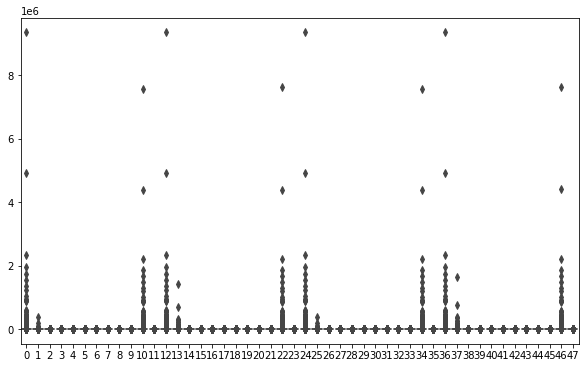

In [23]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(data=x_treino_s1)

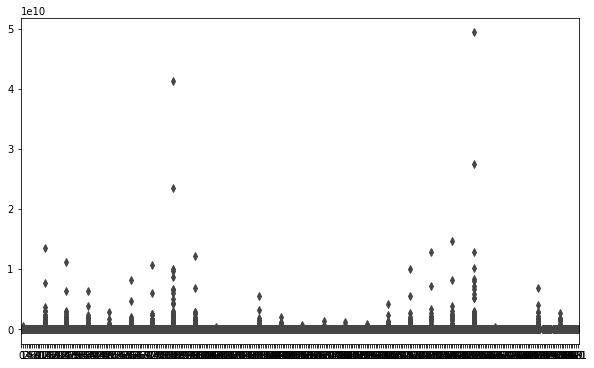

In [24]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(data=x_treino_s2)

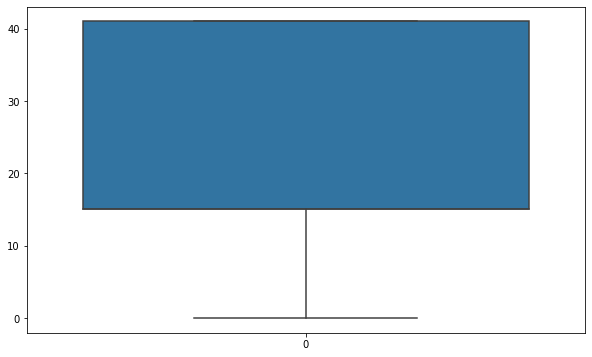

In [25]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(data=y_treino_s1)

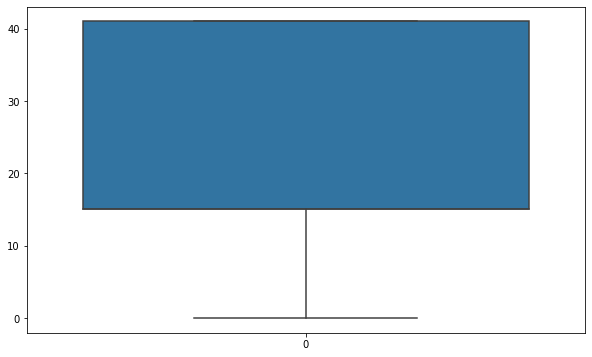

In [26]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(data=y_treino_s2)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


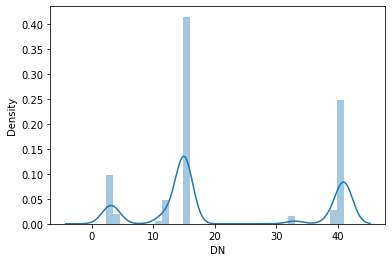

In [27]:
# distribuição da coluna DN Sentinel 1
ax = sns.distplot(dados_s1.DN)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


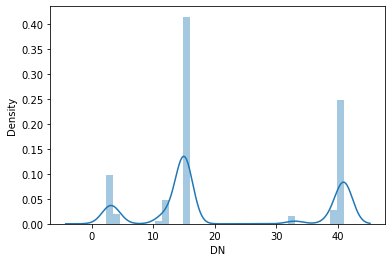

In [28]:
# distribuição da coluna DN Sentinel 2
ax = sns.distplot(dados_s2.DN)

In [29]:
# Normalização com StandardScaler Sentinel 1
escale = StandardScaler()
escale.fit(x_treino_s1)
x_norm_s1 = escale.transform(x_treino_s1)

In [30]:
# Normalização com StandardScaler Sentinel 2
escale = StandardScaler()
escale.fit(x_treino_s2)
x_norm_s2 = escale.transform(x_treino_s2)

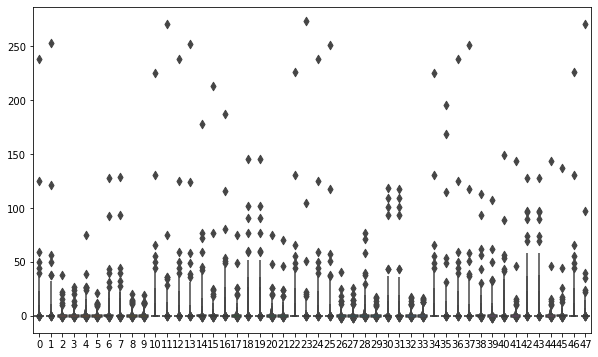

In [31]:
plt.figure(figsize=(10,6))
ax = sns.boxenplot(data=x_norm_s1)

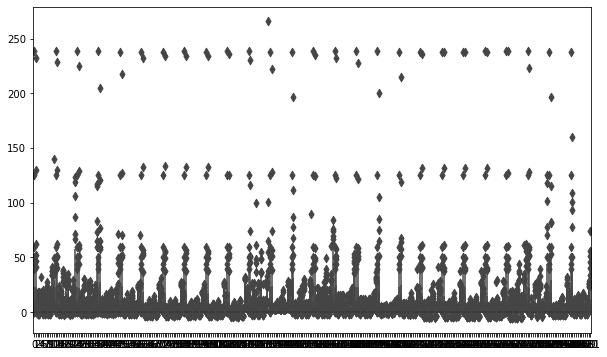

In [32]:
plt.figure(figsize=(10,6))
ax = sns.boxenplot(data=x_norm_s2)

#Função train_test_split

É uma função de seleção de **modelo do Sklearn** para dividir matrizes de dados em **dois subconjuntos**: dados de treinamento e dados de teste. Por padrão, essa função faz partições aleatórias para os dois conjuntos. Entretanto, é possível especificar um estado aleatório para a operação.

```
-------------------------------------------------------------------------------
Função train_test_split(X, y, train-size=None, test_size=None,
                        random_state=None, shuffle = True, stratify = None)
-------------------------------------------------------------------------------
Entrada: | X e y      --> São o conjunto de dados que serão utilizados. 
         | train_size --> Define o tamanho do conjunto de dados de treinamento.
         |                Existem 3 opções: 
         |                     None --> padrão
         |                     Int --> requer o número exato de amostras
         |                     Float --> varua de 0.1 a 1.0.
         | test_size --> Especifica o tamanho do conjunto de dados de teste. O  
         |               estado padrão se adapta ao tamanho do treinamento.
         |               Será definido como 0.25 se o tamanho do treinamento
         |               for definido como padrão.
         | radom_state --> O modo padrão executa uma divisão aleatória usando
         |                 **np.random**. Como alternativa, você pode adicionar 
         |                 um número inteiro usando um número exato.
         | shuffle --> Se deve ou não embaralhar os dados antes de dividir. 
         |             Se shuffle = False, stratify deve ser igual a None.
         | stratify --> Se for igual a None, os dados são divididos de forma
         | estratificados  
---------|--------------------------------------------------------------------- 
Saída    | retorna os conjuntos de treinamento e teste
         |      --> X_train, X_test, y_train e y_test
-------------------------------------------------------------------------------
```

In [33]:
x_train_s1, x_test_s1, y_train_s1, y_test_s1 = train_test_split(x_norm_s1, y_treino_s1, stratify=y_treino_s1, random_state=1)

In [34]:
x_train_s1.shape

(67547, 48)

In [35]:
x_test_s1.shape

(22516, 48)

In [36]:
x_train_s2, x_test_s2, y_train_s2, y_test_s2 = train_test_split(x_norm_s2, y_treino_s2, stratify=y_treino_s2, random_state=1)

In [37]:
x_train_s2.shape

(67531, 312)

In [38]:
x_test_s2.shape

(22511, 312)

In [39]:
# mlp = MLPClassifier(hidden_layer_sizes=(10,100,17 ), activation='tanh', solver='sgd', 
#                    alpha=0.0001, batch_size=200, learning_rate='adaptive', 
#                     learning_rate_init=0.2, max_iter=2000,  
#                     verbose=True,  
#                     momentum=0.7, early_stopping=True, 
#                     validation_fraction=0.1, n_iter_no_change=8)
# mlp = MLPClassifier(hidden_layer_sizes=(22,22,64 ), activation='logistic', solver='sgd', 
#                    alpha=0.0001, batch_size=200, learning_rate='adaptive', 
#                     learning_rate_init=0.2, max_iter=2000,  
#                     verbose=True,  
#                     momentum=0.8, early_stopping=True, 
#                     validation_fraction=0.1, n_iter_no_change=8)
# mlp = MLPClassifier(hidden_layer_sizes=(22,22,22 ), activation='logistic', solver='sgd', 
#                    alpha=0.0001, batch_size=100, learning_rate='adaptive', 
#                     learning_rate_init=0.2, max_iter=2000,  
#                     verbose=True,  
#                     momentum=0.8, early_stopping=True, 
#                     validation_fraction=0.1, n_iter_no_change=8) # 47, ... 65 ...
# mlp = MLPClassifier(hidden_layer_sizes=(44,33,22 ), activation='logistic', solver='sgd', 
#                    alpha=0.0001, batch_size=70, learning_rate='adaptive', 
#                     learning_rate_init=0.4, max_iter=2000,  
#                     verbose=True,  
#                     momentum=0.8, early_stopping=True, 
#                     validation_fraction=0.1, n_iter_no_change=8)
# mlp = MLPClassifier(hidden_layer_sizes=(44,33,22 ), activation='logistic', solver='sgd', 
#                    alpha=0.0001, batch_size='auto', learning_rate='adaptive', 
#                     learning_rate_init=0.5, max_iter=2000,  
#                     verbose=True,  
#                     momentum=0.8, early_stopping=True, 
#                     validation_fraction=0.1, n_iter_no_change=8)  # 65,7
# mlp = MLPClassifier(hidden_layer_sizes=(100,33,50 ), activation='logistic', solver='sgd', 
#                    alpha=0.0001, batch_size=300, learning_rate='adaptive', 
#                     learning_rate_init=0.2, max_iter=2000,  
#                     verbose=True,  
#                     momentum=0.7, early_stopping=True, 
#                     validation_fraction=0.1, n_iter_no_change=8)  # 65,99
# mlp = MLPClassifier(hidden_layer_sizes=(50,100 ), activation='relu', solver='adam', 
#                    alpha=0.0001, batch_size='auto', learning_rate='constant', 
#                     learning_rate_init=0.001, max_iter=200,  
#                     verbose=True,  
#                     momentum=0.9, early_stopping=True, 
#                     validation_fraction=0.1, n_iter_no_change=9) # 66
mlp = MLPClassifier(hidden_layer_sizes=(100,50 ), activation='logistic', solver='sgd', 
                   alpha=0.0001, batch_size=500, learning_rate='adaptive', 
                    learning_rate_init=0.3, max_iter=2000,  
                    verbose=True,  
                    momentum=0.8, early_stopping=True, 
                    validation_fraction=0.1, n_iter_no_change=8)# 66,14%
# mlp = MLPClassifier(hidden_layer_sizes=(100,50,65 ), activation='tanh', solver='sgd', 
#                    alpha=0.01, batch_size=200, learning_rate='adaptive', 
#                     learning_rate_init=0.3, max_iter=500, tol=0.0001,
#                     verbose=True,  
#                     momentum=0.7, early_stopping=True, 
#                     validation_fraction=0.01, n_iter_no_change=4)

In [40]:
mlp.fit(x_train_s1,y_train_s1)

Iteration 1, loss = 1.33741447
Validation score: 0.555736
Iteration 2, loss = 1.25064653
Validation score: 0.558105
Iteration 3, loss = 1.23976370
Validation score: 0.557365
Iteration 4, loss = 1.23178822
Validation score: 0.559585
Iteration 5, loss = 1.22002031
Validation score: 0.559734
Iteration 6, loss = 1.21089422
Validation score: 0.567283
Iteration 7, loss = 1.20341778
Validation score: 0.565359
Iteration 8, loss = 1.19864250
Validation score: 0.555440
Iteration 9, loss = 1.19408538
Validation score: 0.559585
Iteration 10, loss = 1.19011611
Validation score: 0.566839
Iteration 11, loss = 1.18675804
Validation score: 0.565063
Iteration 12, loss = 1.18302594
Validation score: 0.567283
Iteration 13, loss = 1.18103821
Validation score: 0.568024
Iteration 14, loss = 1.17799985
Validation score: 0.566839
Iteration 15, loss = 1.17568173
Validation score: 0.568320
Iteration 16, loss = 1.17314518
Validation score: 0.566839
Iteration 17, loss = 1.17124620
Validation score: 0.567283
Iterat

MLPClassifier(activation='logistic', batch_size=500, early_stopping=True,
              hidden_layer_sizes=(100, 50), learning_rate='adaptive',
              learning_rate_init=0.3, max_iter=2000, momentum=0.8,
              n_iter_no_change=8, solver='sgd', verbose=True)

In [41]:
predict_s1 = mlp.predict(x_test_s1)

In [42]:
predict_s1

array([15, 41, 15, ..., 15, 15, 15])

In [43]:
print('Acurácia Sentinel 1: {}%' .format(round(mlp.score(x_test_s1, y_test_s1) * 100,4)))

Acurácia Sentinel 1: 57.4836%


In [44]:
print(confusion_matrix(y_test_s1, predict_s1))
print(classification_report(y_test_s1, predict_s1))

[[   0    0    0    0    0   12    0    0    0    1]
 [   0  315    0    0    0 2083    0    2    2  105]
 [   0   39    0    0    0  453    0    0    0   12]
 [   0    4    0    0    0  137    0    1    0   10]
 [   0   44    0    0    0 1040    0    2    0  137]
 [   0  136    0    0    0 8519    0   18    5 1940]
 [   0    0    0    0    0    2    0    0    0    4]
 [   0    6    0    0    0  325    0   16    0   73]
 [   0    3    0    0    0   89    0    0  111  507]
 [   0    3    0    0    0 2337    0    4   37 3982]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           3       0.57      0.13      0.21      2507
           4       0.00      0.00      0.00       504
          11       0.00      0.00      0.00       152
          12       0.00      0.00      0.00      1223
          15       0.57      0.80      0.67     10618
          24       0.00      0.00      0.00         6
          33       0.37      0.04   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [45]:
mlp.fit(x_train_s2,y_train_s2)

Iteration 1, loss = 1.14865768
Validation score: 0.592094
Iteration 2, loss = 0.99749239
Validation score: 0.609269
Iteration 3, loss = 0.94771290
Validation score: 0.628813
Iteration 4, loss = 0.91296786
Validation score: 0.632662
Iteration 5, loss = 0.88695262
Validation score: 0.640361
Iteration 6, loss = 0.86551701
Validation score: 0.642730
Iteration 7, loss = 0.84898345
Validation score: 0.649837
Iteration 8, loss = 0.83197063
Validation score: 0.642286
Iteration 9, loss = 0.81707495
Validation score: 0.654723
Iteration 10, loss = 0.80875139
Validation score: 0.667160
Iteration 11, loss = 0.79625865
Validation score: 0.664051
Iteration 12, loss = 0.78850184
Validation score: 0.660497
Iteration 13, loss = 0.78100036
Validation score: 0.665383
Iteration 14, loss = 0.77304472
Validation score: 0.673823
Iteration 15, loss = 0.76731641
Validation score: 0.673379
Iteration 16, loss = 0.76073125
Validation score: 0.669381
Iteration 17, loss = 0.75524220
Validation score: 0.668789
Iterat

MLPClassifier(activation='logistic', batch_size=500, early_stopping=True,
              hidden_layer_sizes=(100, 50), learning_rate='adaptive',
              learning_rate_init=0.3, max_iter=2000, momentum=0.8,
              n_iter_no_change=8, solver='sgd', verbose=True)

In [46]:
predict_s2 = mlp.predict(x_test_s2)

In [47]:
predict_s2

array([15,  3, 41, ..., 15, 15, 15])

In [48]:
print('Acurácia Sentinel 2: {}%' .format(round(mlp.score(x_test_s2, y_test_s2) * 100,4)))

Acurácia Sentinel 2: 69.1395%


In [49]:
print(confusion_matrix(y_test_s2, predict_s2))
print(classification_report(y_test_s2, predict_s2))

[[   0    2    1    0    3    7    0    0    0    1]
 [   0 1337   61    2  122  903    0   32    0   50]
 [   0   52  250    6   77  100    0   14    0    5]
 [   0   25   35    9   42   19    0   16    0    6]
 [   0  139   92    6  424  401    0   49    3  109]
 [   0  488   68    1  128 8218    0   40   38 1633]
 [   0    0    0    0    1    1    0    0    0    4]
 [   0   36    5    2   47   88    0  223    0   19]
 [   0    1    0    0    2   74    0    0  197  436]
 [   0   30    1    1   22 1295    0   12   94 4906]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           3       0.63      0.53      0.58      2507
           4       0.49      0.50      0.49       504
          11       0.33      0.06      0.10       152
          12       0.49      0.35      0.41      1223
          15       0.74      0.77      0.76     10614
          24       0.00      0.00      0.00         6
          33       0.58      0.53   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
